## Recognising Handwritten Digit on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1.Data Preparation

In [4]:
df = pd.read_csv('mnist_train.csv')

In [5]:
print(df.shape)

(60000, 785)


In [6]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [7]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [9]:
X = data[:,1:]
Y = data[:,0]

In [10]:
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [11]:
split = (int)(0.8 *X.shape[0])
print(split)

48000


In [12]:
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(48000, 784) (48000,)
(12000, 784) (12000,)


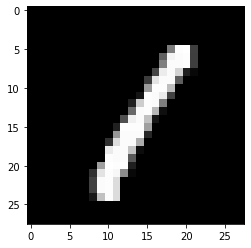

In [22]:
## Visualising Samples
def drawing(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap ="gray")
    plt.show()
drawing(X_train[3])

### Step2. KNN

In [24]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
        
    vals = sorted(vals)
    #Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    
    return pred

## Step 3: Make Predictions

In [28]:
pred = knn(X_train,Y_train,X_test[9])
print(int(pred))

(array([2.]), array([5], dtype=int64))
2


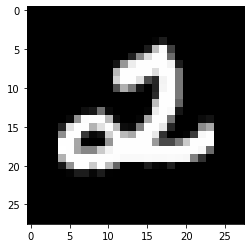

In [29]:
drawing(X_test[9])

In [ ]:
## Complexity O(N*Q)----->test time
## Training Time ------>O(1)